
**Task 1: Tools for Data Science** 

> Tina Garg, Ananya Burli



In [42]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.rc('lines', linewidth=2)
plt.rc('legend',fontsize=20)


In [43]:
dataframe=pd.read_csv('task1.csv')
day = df.iloc[:, 0]
cases = df.iloc[:, 1]

In [44]:
n=float(len(day))  #number of data points

learning rate:  0.0001
Optimised loss function:  0.6862845577392276
m: 0.11630305651198743
c: -0.22028559183954108


Number of cases predicted on day 110:  288673.2268651627
The model predicts that on day 110 enough beds are NOT available.

learning rate:  1
Optimised loss function:  0.0
m: nan
c: nan


learning rate:  1e-05
Optimised loss function:  0.773117952432636
m: 0.11332919457115655
c: -0.023034058252498928




<function matplotlib.pyplot.show>

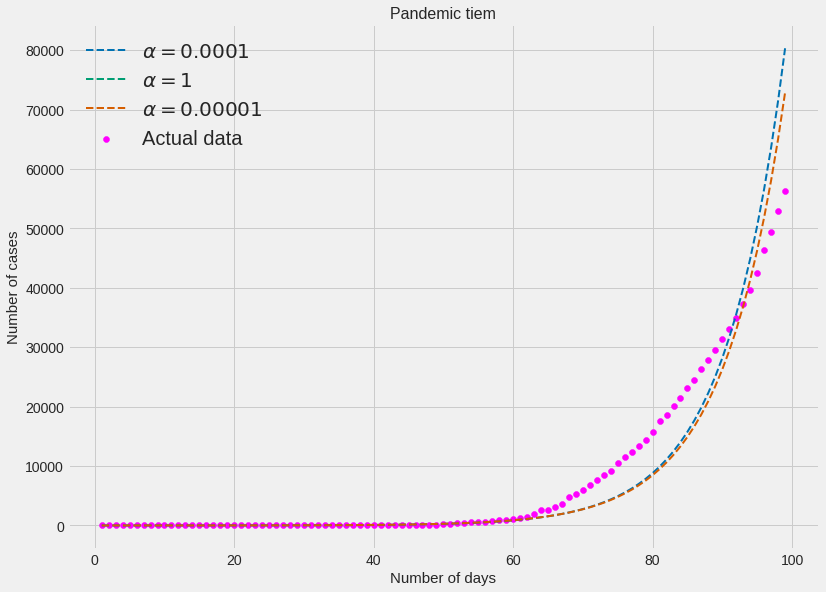

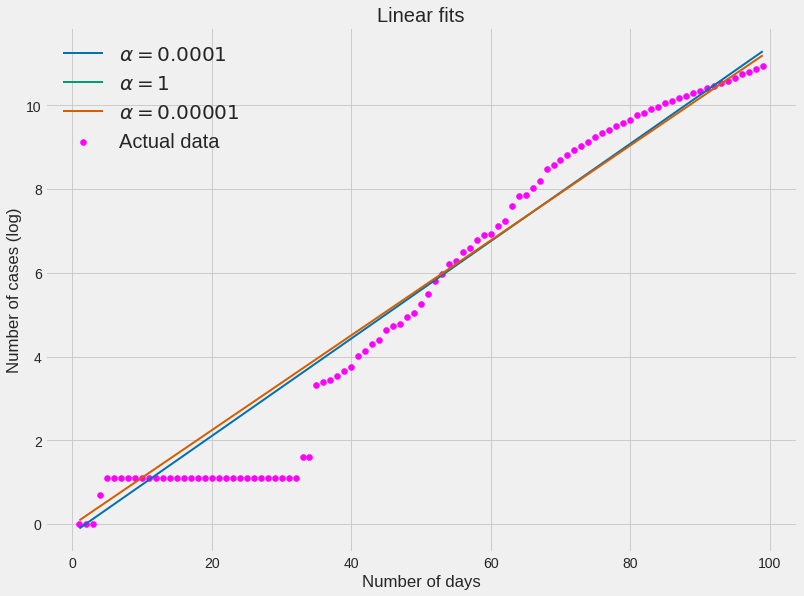

In [45]:
iter=5000;   #number of iterations
alpha=[0.0001,1,0.00001]  #the learning rates
y=[]
"""
This model uses linear regression. First the days vs cases are plotted as is. Then the days vs log(cases) are plotted. 

"""
for a in alpha:
  c2= 0
  logc1= 0
  for i in range(iter):
    log_cases_pred= c2*day + logc1
    d_c2 = (-2/n) * sum(day* (np.log(cases) - log_cases_pred))  # Derivative wrt m
    d_logc1 = (-2/n) * sum(np.log(cases) - log_cases_pred)  # Derivative wrt c
    c2 = c2 - a * d_c2  # Update m
    logc1 = logc1 - a * d_logc1  # Update c 
  log_cases_pred=logc1 + c2*day
  print('learning rate: ', a)
  E=(1/n)*np.sum((np.log(cases)-log_cases_pred)**2)
  print('Optimised loss function: ', E)
  print('m:', c2)
  print('c:',logc1) 
  print('\n')
  if a==0.0001:
    day_110= np.exp(c2*110 + logc1)
    print("Number of cases predicted on day 110: ", day_110)
    if(day_110 < 100000):
      print(" The model predicts that on day 110 enough beds are available.\n")
    else:
      print("The model predicts that on day 110 enough beds are NOT available.\n")
  y.append(log_cases_pred)
  cases_pred=np.exp(log_cases_pred)
  plt.plot(day,cases_pred,'--')

plt.scatter(day,cases, color='magenta')
plt.title('Pandemic tiem', fontsize= 16)
plt.xlabel('Number of days', fontsize=15)
plt.ylabel('Number of cases', fontsize=15)
plt.legend([r'$\alpha=0.0001$', r'$\alpha=1$', r'$\alpha=0.00001$',"Actual data"])
#plt.show()
plot2=plt.figure(2)
plt.scatter(day, np.log(cases),color='magenta')
plt.plot(day,y[0])
plt.plot(day, y[1])
plt.plot(day,y[2])
plt.legend([r'$\alpha=0.0001$', r'$\alpha=1$', r'$\alpha=0.00001$',"Actual data"])
plt.xlabel("Number of days")
plt.ylabel("Number of cases (log)")
plt.title("Linear fits")
plt.show


The **learning rate 1** leads to oscillation about the optima and the optimum of the loss function is not reached. it is possible that we were climbing up the curve and the curve became steeper and steeper such that the derivative quickly blew up (which is why it gives Nan). 

In case of **learning rate 0.00001**, the fit we get is more erroneous than our first choice (Note the difference in optimum loss function). For this, the convergence is much slower and we need more iterations to reach the optimum, ideally.